# Single Slide Domain Detection Evaluation for scGPT-spatial (zero-shot)
This notebook is to evaluate the performance on single-slide domain detection, from the perspectives of prediction accuracy, spatial domain continuity, robustness and visualization.

Input: spatial coordinates, true layer, predicted layer




In [11]:
import numpy as np
import pandas as pd
import scanpy as sc

# load data
data_folder = '../data/1_visium/scGPT-spatial-zero-shot/'
adata = sc.read_h5ad(data_folder + 'output.h5ad')
adata = adata[np.logical_not(adata.obs['ground_truth'].isna())]  #remove NAN
print(adata)
print(adata.obs.ground_truth.unique())
print(adata.obs.domain_scgpt.unique())

View of AnnData object with n_obs × n_vars = 4221 × 23325
    obs: 'in_tissue', 'array_row', 'array_col', 'Region', 'ground_truth', 'domain_scgpt_tmp', 'domain_scgpt'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_name', 'id_in_vocab'
    uns: 'domain_scgpt_tmp', 'neighbors', 'spatial'
    obsm: 'X_scGPT', 'spatial'
    obsp: 'connectivities', 'distances'
['Layer1', 'Layer3', 'WM', 'Layer6', 'Layer5', 'Layer2', 'Layer4']
Categories (7, object): ['Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'WM']
[2, 0, 3, 1, 4, 5]
Categories (6, int8): [0, 1, 2, 3, 4, 5]


## 1. Prediction Accuracy

In [12]:
from evaluation_utils import STFMEvaluation

eval = STFMEvaluation()
metrics = eval.compute_prediction_accuracy(adata.obs.ground_truth, adata.obs.domain_scgpt)

metrics.to_csv(data_folder + 'accuracy.csv', sep=',')
print(metrics)

ARI          0.144875
NMI          0.201168
HOM          0.191544
COM          0.211812
V_Measure    0.201168
dtype: float64


## 2. Spatial Domain Continuity

In [13]:
domain_continuity_metrics = eval.compute_domain_continuity(
    spatial_coordinates=pd.concat([adata.obs.array_row, adata.obs.array_col], axis=1),
    labels_pred=adata.obs.domain_scgpt)

domain_continuity_metrics.to_csv(data_folder + 'continuity.csv', sep=',')
print(domain_continuity_metrics)

ASW     -0.119662
CHAOS    0.065751
PAS      0.648898
dtype: float64


## 3. Visualization


#### a. Histology

/Users/sheryli/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


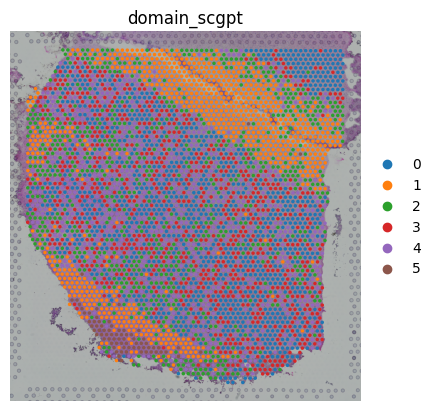

In [14]:
from evaluation_utils import STFMEvaluation

# prediction
eval = STFMEvaluation()
eval.plot_spatial_domains(adata, domain_col='domain_scgpt', use_histology=True, slice_id='151507',
                          save=data_folder + 'pred_spatial_domains.png')

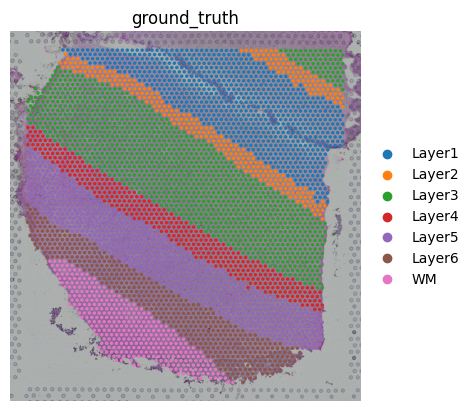

In [5]:
# ground truth
eval.plot_spatial_domains(adata, domain_col='ground_truth', use_histology=True, slice_id='151507',
                          save=data_folder + 'ground_truth_spatial_domains.png')

#### b. UMAP

/Users/sheryli/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


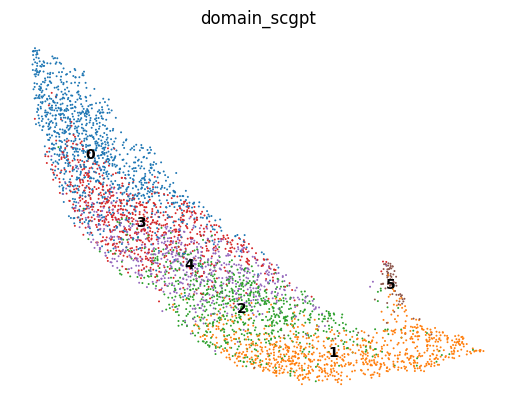

In [15]:
# prediction
eval.plot_embedding_domains(adata, domain_col='domain_scgpt', basis='umap', compute_if_missing=True,
                            save=data_folder + 'pred_emb_umap.png')

/Users/sheryli/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


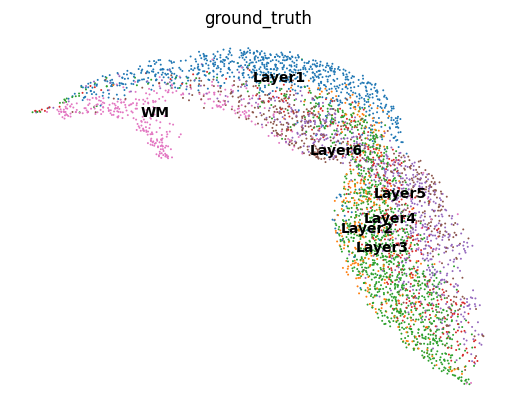

In [7]:
# ground truth
eval.plot_embedding_domains(joined_adata, domain_col='ground_truth', basis='umap', compute_if_missing=True,
                            save=data_folder + 'ground_truth_emb_domains.png')

# Single Slide Domain Detection Evaluation for scGPT-spatial (zero-shot) + BASS

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

# load data
data_folder = '../data/1_visium/scGPT-spatial-zero-shot/'
adata = sc.read_h5ad(data_folder + 'output.h5ad')
adata = adata[np.logical_not(adata.obs['ground_truth'].isna())]  #remove NAN
print(adata)
print(adata.obs.ground_truth.unique())
print(adata.obs.domain_scgpt.unique())

View of AnnData object with n_obs × n_vars = 4221 × 23325
    obs: 'in_tissue', 'array_row', 'array_col', 'Region', 'ground_truth', 'domain_scgpt_tmp', 'domain_scgpt'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_name', 'id_in_vocab'
    uns: 'domain_scgpt_tmp', 'neighbors', 'spatial'
    obsm: 'X_scGPT', 'spatial'
    obsp: 'connectivities', 'distances'
['Layer1', 'Layer3', 'WM', 'Layer6', 'Layer5', 'Layer2', 'Layer4']
Categories (7, object): ['Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'WM']
[2, 0, 3, 1, 4, 5]
Categories (6, int8): [0, 1, 2, 3, 4, 5]


In [3]:
# load bass output
bass_output = pd.read_csv(data_folder + '1_visium_scgpt_spatial_zero_shot_bass.csv', sep=',')
bass_output['cell'] = bass_output["cell"].astype(str).str.strip()
mapping = {1: 'Layer1', 2: 'Layer2', 3: 'Layer3', 4: 'Layer4', 5: 'Layer5', 6: 'Layer6'}
bass_output['domain'] = bass_output["domain"].map(mapping).fillna(0)

print(bass_output.head())

    slice                cell     x     y  domain
0  slice1  AAACAACGAATAGTTC-1  3276  2514  Layer3
1  slice1  AAACAAGTATCTCCCA-1  9178  8520  Layer1
2  slice1  AAACAATCTACTAGCA-1  5133  2878  Layer3
3  slice1  AAACACCAATAACTGC-1  3462  9581  Layer6
4  slice1  AAACAGCTTTCAGAAG-1  2779  7663  Layer1


In [4]:
df = bass_output.merge(
    adata.obs[['ground_truth']],
    left_on="cell",
    right_index=True,
    how="inner",
    sort=False,
    suffixes=("", "_obs")
)

print(df.head())

    slice                cell     x     y  domain ground_truth
0  slice1  AAACAACGAATAGTTC-1  3276  2514  Layer3       Layer1
1  slice1  AAACAAGTATCTCCCA-1  9178  8520  Layer1       Layer3
2  slice1  AAACAATCTACTAGCA-1  5133  2878  Layer3       Layer1
3  slice1  AAACACCAATAACTGC-1  3462  9581  Layer6           WM
4  slice1  AAACAGCTTTCAGAAG-1  2779  7663  Layer1       Layer6


# 1. Prediction Accuracy

In [5]:
from evaluation_utils import STFMEvaluation

eval = STFMEvaluation()
metrics = eval.compute_prediction_accuracy(df.ground_truth, df.domain)

metrics.to_csv(data_folder + '1_visium_scgpt_bass_accuracy_metrics.csv', sep=',')
print(metrics)

ARI          0.200216
NMI          0.214792
HOM          0.209263
COM          0.220620
V_Measure    0.214792
dtype: float64


## 2. Spatial Domain Continuity

In [6]:
domain_continuity_metrics = eval.compute_domain_continuity(spatial_coordinates=pd.concat([df.x, df.y], axis=1),
                                                           labels_pred=df.domain)
domain_continuity_metrics.to_csv(data_folder + '1_visium_scgpt_bass_continuity_metrics.csv', sep=',')
print(domain_continuity_metrics)

ASW     -0.023099
CHAOS    0.064779
PAS      0.566927
dtype: float64


## 3. Visualization

In [7]:
from evaluation_utils import merge_df_into_adata_obs

# merge output into adata
joined_adata = merge_df_into_adata_obs(adata, bass_output, cell_col='cell', how='left',
                                       suffix='_bass', copy=True, allow_duplicates=False)
print(joined_adata)

AnnData object with n_obs × n_vars = 4221 × 23325
    obs: 'in_tissue', 'array_row', 'array_col', 'Region', 'ground_truth', 'domain_scgpt_tmp', 'domain_scgpt', 'slice_bass', 'x_bass', 'y_bass', 'domain_bass'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_name', 'id_in_vocab'
    uns: 'domain_scgpt_tmp', 'neighbors', 'spatial'
    obsm: 'X_scGPT', 'spatial'
    obsp: 'connectivities', 'distances'


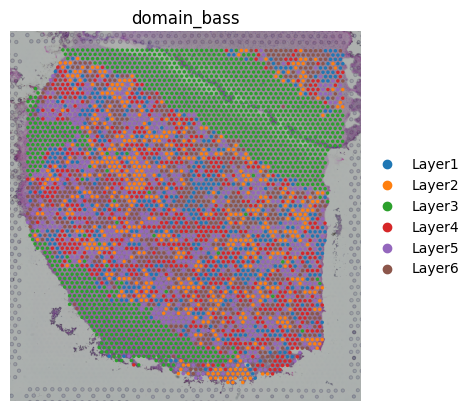

In [8]:
from evaluation_utils import STFMEvaluation

# prediction
eval = STFMEvaluation()
eval.plot_spatial_domains(joined_adata, domain_col='domain_bass', use_histology=True, slice_id='151507',
                          save=data_folder + 'scgpt_bass_pred_spatial_domains.png')

/Users/sheryli/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


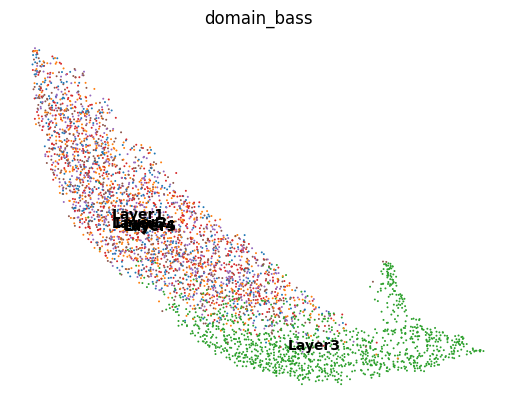

In [9]:
# prediction
eval.plot_embedding_domains(joined_adata, domain_col='domain_bass', basis='umap', compute_if_missing=True, save=data_folder + 'scgpt_bass_pred_emb_umap.png')